<a href="https://colab.research.google.com/github/DenisMihailapov/open_stt/blob/master/%D0%A2%D0%B5%D1%81%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B1%D0%B8%D0%B1%D0%BB%D0%B8%D0%BE%D1%82%D0%B5%D0%BA_%D0%B4%D0%BB%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D1%8B_%D1%81_%D0%B0%D1%83%D0%B4%D0%B8%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display

import IPython.display as ipd

In [ ]:
PATH = '/content/drive/My Drive/ASR'

In [ ]:
audio_data = PATH + '/Audio/1.mp3'
x , sr = librosa.load(audio_data)
duration_seconds = len(x)/sr

In [ ]:
ipd.Audio(audio_data)

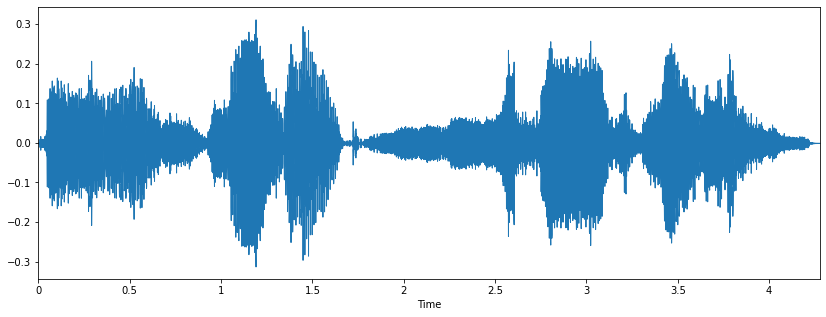

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)


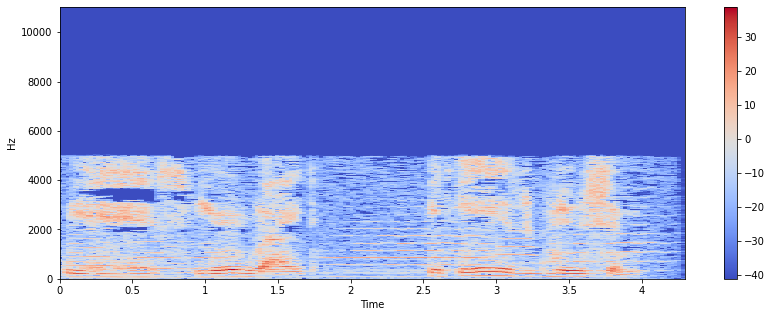

In [ ]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [ ]:
len(x)/sr

4.277369614512471

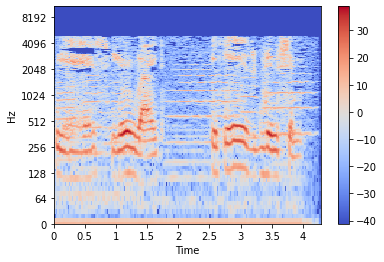

In [ ]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

RuntimeError: ignored

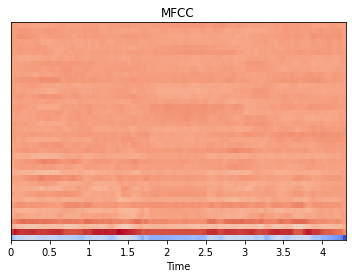

In [ ]:
fig, ax = plt.subplots()
mfccs = librosa.feature.mfcc(x, sr=sr, n_mfcc=40)
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
ax.set(title='MFCC')
plt.colorbar()
print(len(mfccs[1]))

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

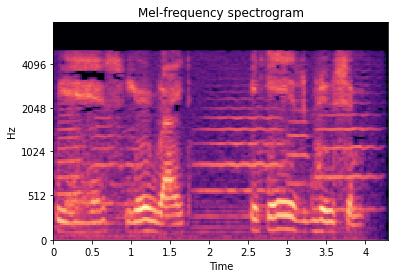

In [ ]:
fig, ax = plt.subplots()
S = librosa.feature.melspectrogram(x, sr=sr, n_mels=128,
                                    fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=8000, ax=ax)
ax.set(title='Mel-frequency spectrogram')

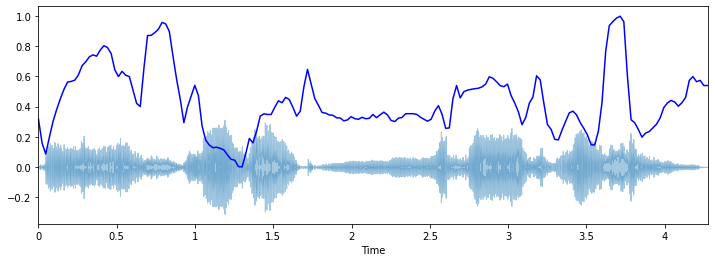

In [ ]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
# Вычисление временной переменной для визуализации
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Нормализация спектрального центроида для визуализации
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
# Построение спектрального центроида вместе с формой волны
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

In [2]:
s = [5,4,4,4, 5,5,5,4, 3,4,3,3, 4,4,4,4,5, 5,5,5,4, 3,5,3,5,3]
sum(s)/len(s)

4.153846153846154